In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [8]:
pk = df.copy()
pk

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [9]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [10]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [12]:
pd.__version__

'1.3.4'

In [13]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [14]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [15]:
missing_values = ["n/a","na","--"]

In [16]:
df['NUM_BATH'].unique()

array(['1', '1.5', nan, '2', 'HURLEY'], dtype=object)

In [17]:
for baris in df['ST_NAME']:
    try:
        int(baris)
        print('Data Angka')
    except:
        print('Bukan Data Angka')
# kalo di for barisnya gausah didefine dulu
#try-except bisa digunkana cuma kalo setelah dicoba error maka lakukan except

Bukan Data Angka
Bukan Data Angka
Bukan Data Angka
Bukan Data Angka
Bukan Data Angka
Bukan Data Angka
Bukan Data Angka
Bukan Data Angka
Bukan Data Angka


In [18]:
#miss value standard pake isnull yg pake NaN
#ada juga miss value yg tak terduga


In [19]:
#12 adalah data nyeleneh karena bukan string y/n
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [20]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan #miss value di numpy
    except ValueError:
        pass
    cnt+=1

In [21]:
df.loc[1, 'OWN_OCCUPIED'] #akses elemen di data frame dengan label

'N'

In [22]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [23]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [24]:
df.isnull().values.any() #ngecek ada miss value dalam dataframe scr keseluruhan

True

In [25]:
df.isnull().values.sum() #total miss value di dataset

9

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values = missing_values)

In [27]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [28]:
#df.replace({'--'}:np.nan,'na':np.nan)
#buat ganti satu2 missing value

In [29]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan #miss value di numpy
    except ValueError:
        pass
    cnt+=1

In [30]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [31]:
df.isnull().values.sum()

12

In [32]:
df['ST_NUM'] = df['ST_NUM'].fillna(125)

In [33]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [34]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)
#buat ngisi elemen kosong di num bedrooms dengan mediannya

In [35]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [36]:
df['SQ_FT'].fillna(df['SQ_FT'].median())

0    1000.0
1     950.0
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7     950.0
8    1800.0
Name: SQ_FT, dtype: float64

In [37]:
df['NUM_BEDROOMS'] = df['NUM_BEDROOMS'].astype('int64')
#ganti tipe data

In [38]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3,1,NaN
8,100009000.0,215.0,TREMONT,Y,3,2,1800.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  7 non-null      object 
 4   NUM_BEDROOMS  9 non-null      int64  
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         7 non-null      float64
dtypes: float64(3), int64(1), object(3)
memory usage: 632.0+ bytes


In [40]:
df['NUM_BATH'].replace({np.nan:0,'HURLEY':0})

0      1
1    1.5
2      1
3      0
4      2
5      1
6      0
7      1
8      2
Name: NUM_BATH, dtype: object

In [41]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3,1,NaN
8,100009000.0,215.0,TREMONT,Y,3,2,1800.0


install excel


%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [42]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [43]:
data

In [44]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [45]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)
#gamau liat 4 data pertama dan gamau liat 14 data terakhir

In [46]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [47]:
df = pd.read_excel('obes.xls', sheet_name='7.2',skiprows=4,skipfooter=14)

In [48]:
df

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


Dari dataset obes pada chapter 7.2 diketahui bahwa line 0 adalah baris kosong. begitu pula nama kolom pertamanya adalah unnamed.
- maka harus dilakukan pengubahan nama kolom jadi date
- menghapus baris kosong

In [62]:
#ganti nama kolom
df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
df

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [60]:
df.dropna(inplace=True)

In [61]:
df

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [52]:
#df.set_index('Year',inplace=True)

In [53]:
df

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


<AxesSubplot:>

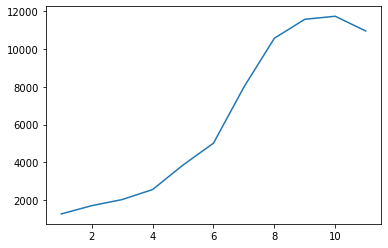

In [54]:
df['Total'].plot()

<AxesSubplot:>

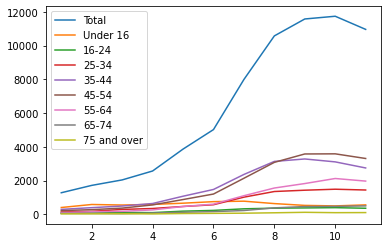

In [55]:
df.plot()

In [56]:
df.drop('Total',axis=1)

,Year,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [57]:
df.drop('2012/13',axis=0)

KeyError: "['2012/13'] not found in axis"

In [ ]:
df

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:xlabel='Year'>

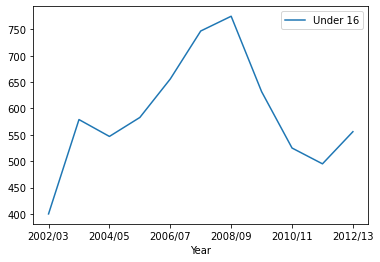

In [ ]:
df['Under 16'].plot(label="Under 16", legend=True)

<AxesSubplot:xlabel='Year'>

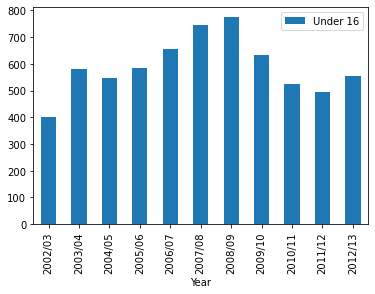

In [ ]:
df['Under 16'].plot(kind='bar',label="Under 16", legend=True)

In [ ]:
df[df['Total']<5000]

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
